# Background: 

We will be using a text dataset to classify spam and ham messages. First we will cover EDA and detailed steps of engineering involved for text data. We will then build a pipeline to implement these steps in a simplified and consolidated manner

# Part 1: Importing libraries and the dataset

In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> s


    Error loading s: Package 's' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WS


Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> c

Data Server:
  - URL: <https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml>
  - 7 Package Collections Available
  - 107 Individual Packages Available

Local Machine:
  - Data directory: C:\Users\hp\AppData\Roaming\nltk_data

---------------------------------------------------------------------------
    s) Show Config   u) Set Server URL   d) Set Data Dir   m) Main Menu
---------------------------------------------------------------------------
Config> s

Data Server:
  - URL: <https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml>
  - 7 Package Collections Available
  - 107 Individual Packages Available

Local Machine:
  - Data directory: C:\Users\hp\AppData\Roaming\nltk_data

------------------------

Hit Enter to continue: 
  [ ] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\abc.zip.
       | Downloading package alpino to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\alpino.zip.
       | Downloading package biocreative_ppi to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\biocreative_ppi.zip.
       | Downloading package brown to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\brown.zip.
       | Downloading package brown_tei to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\brown_tei.zip.
       | Downloading package cess_cat to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\cess_cat.zip.
       | Downloading package cess_esp to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\cess_esp.zip.
       | Downloading package

       |   Unzipping corpora\smultron.zip.
       | Downloading package state_union to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\state_union.zip.
       | Downloading package stopwords to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Package stopwords is already up-to-date!
       | Downloading package subjectivity to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\subjectivity.zip.
       | Downloading package swadesh to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\swadesh.zip.
       | Downloading package switchboard to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\switchboard.zip.
       | Downloading package timit to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Unzipping corpora\timit.zip.
       | Downloading package toolbox to
       |     C:\Users\hp\AppData\Roaming\nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = []
for line in open('smsspamcollection/SMSSpamCollection'):
    messages.append(line.rstrip())

#above code can be compressed within one line as below list comprehension 
# messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
for msg_num,msg in enumerate(messages[:10]):
    print(msg_num,msg)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

**The above outputs tell us that our file is a tab separate values file. The first word tells us whether the message is a spam or ham followed by the actual message itself**

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Part 2: Exploratory Data Analysis

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Here, as we can see the longest message has a length of 910 characters. Let us see what this message is

In [15]:
messages[messages['length']==910]['message'].iloc[0] #long love letter, let's skip reading it

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

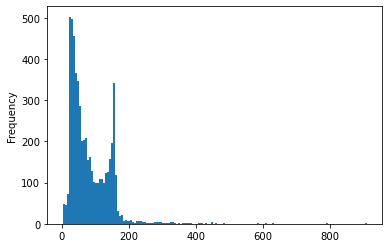

In [16]:
messages['length'].plot.hist(bins=150)

There is a sort of bimodal distribution in the above histogram. Let us bifurcate it in separate spam and ham histograms for better analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254035AF748>,
      dtype=object)

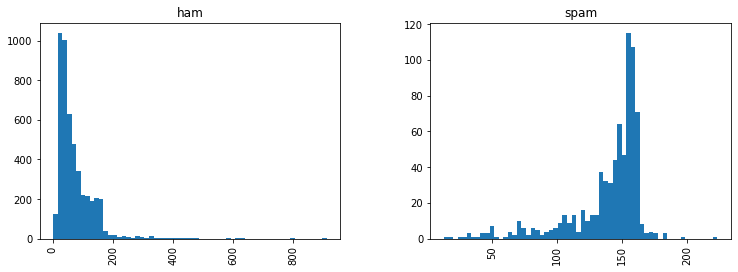

In [17]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

**Key observation: Spam messages have a lower character length whereas ham messages are generally longer**

# Part 3: Tokenization

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
stopwords.words('english') # we will exclude these common english words later from our analysis

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
#Let us create a custom function which will do 2 things - remove punctuation and then remove common english words
#This process is known as tokenization of the input messages

def text_process(mess):
    """
    1. Removes punctuation
    2. Removes stopwords
    3. Returns a list of clean words
    """
    no_punc = []
    for c in mess:
        if c not in string.punctuation:
            no_punc.append(c)
    #no_punc = [char for char in mess if char not in string.punctuation] #list comprehension style of above for loop
    no_punc = ''.join(no_punc) #tying in all letters together after removing punctuations
    clean_mess = []
    for i in no_punc.split():
        if i.lower() not in stopwords.words('english'):
            clean_mess.append(i)
    #clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')] #list comprehension style of above for loop
    return clean_mess

In [63]:
#Sample output
text_process('This text has both punctuation and common english words')

['text', 'punctuation', 'common', 'english', 'words']

In [66]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Part 4: Vectorization

For data analysis using sklearn libraries, we need to convert each token into a vector

We will do this in 3 steps - 
1. Count the number of times a word occurs in each message - term frequency
2. Weigh the counts, so that frequent tokens get lower weight - inverse document frequency
3. Normalise the vectors to unit length, to abstract from the original text length - L2 norm 

**Step 1 - Term Frequency**

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
#Creating bag of words stored in a sparse matrix
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

We have 11,425 unique words in our bag of words sparse matrix

In [74]:
print(len(bow_transformer.vocabulary_))

11425


In [77]:
messages_bow = bow_transformer.transform(messages['message'])

In [87]:
print('Shape of Sparse Matrix:', messages_bow.shape)
print('Count of non-zero values in the Sparse Matrix:',messages_bow.nnz)

Shape of Sparse Matrix: (5572, 11425)
Count of non-zero values in the Sparse Matrix: 50548


**Step 2 - Inverse Document Frequency**

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

In [89]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [90]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Part 5: Training the model on entire data

We will be using Naive Bayes classification algorithm to classify ham and spam messages

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [106]:
#Example prediction
print('Prediction',spam_detect_model.predict(messages_tfidf[4])[0])
print()
print(messages.iloc[4])

Prediction ham

label                                                    ham
message    Nah I don't think he goes to usf, he lives aro...
length                                                    61
Name: 4, dtype: object


In [102]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [103]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

**Here, we have used the entire dataset to train the model. Instead, let us first split the dataset followed by feature engineering and then training the model**

# Part 6: Training the model after data split and building a pipeline

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'],messages['label'],test_size=0.3,random_state=101)

In [109]:
from sklearn.pipeline import Pipeline

In [112]:
#Creating a pipeline with all our feature engineering and model training steps 
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
     ('classifier',MultinomialNB()),
     ])

In [113]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025405BC8828>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [114]:
y_pred = pipeline.predict(X_test)

In [115]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



**Conclusion: From the most basic text engineering and model training, we get a f1-score of 98% for ham messages and 79% for spam messages**

Note: This analysis was done as a follow along of Udemy course - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp